# GitHub URL:
# https://github.com/gsahai1x/AIML

In [165]:
import warnings
warnings.filterwarnings('ignore')

### Data Description:
    The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Domain:
    Banking

### Context:
    This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:
    ID: Customer ID  
    Age: Customer's age in completed years  
    Experience: #years of professional experience  
    Income: Annual income of the customer (Dollar 000)  
    ZIP Code: Home Address ZIP  
    Family: Family size of the customer  
    CCAvg: Avg. spending on credit cards per month (Dollar 000)  
    Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional  
    Mortgage: Value of house mortgage if any. (Dollar 000)  
    Personal Loan: Did this customer accept the personal loan offered in the last campaign?  
    Securities Account: Does the customer have a securities account with the bank?  
    CD Account: Does the customer have a certificate of deposit (CD) account with the bank?  
    Online: Does the customer use internet banking facilities?  
    Credit card: Does the customer use a credit card issued by the bank?  
 
### Learning Outcomes:
    Exploratory Data Analysis  
    Preparing the data to train a model  
    Training and making predictions using a classification model  
    Model evaluation  

### Objective:
    The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Steps and tasks:

    1.Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
    2.EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
        2.1 Number of unique in each column?
        2.2 Number of people with zero mortgage?
        2.3 Number of people with zero credit card spending per month?
        2.4 Value counts of all categorical columns.
        2.5 Univariate and Bivariate
        2.6 Get data model ready
    3.Split the data into training and test set in the ratio of 70:30 respectively (5 marks) 
    4.Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)
    5.Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)
    6.Give conclusion related to the Business understanding of your model? (5 marks) 

### 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [166]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format

In [167]:
#import dataset
loandata = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
loandata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1


### Notes:
    1.Personal Loan is our dependent variable, which is a categorical variable and the output can be either 0 or 1 i.e. according to data set, if a liability customer chose to take a personal loan, then the value is 1, otherwise the value is 0. 
    2.Family, Education, Securities Account, CD Account, Online, CreditCard seem to be cateegorical variables
    3.ID seems to be just a numbering sequence.
    4.It still needs to be seen how to handle Age, Experience
    5.ZIP Code is a categorical variable and it needs to be seen how to handle that. 

In [168]:
#check datatype and nulls
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Notes:
    1.There are no nulls in the data.    
    2.Even the categorical data like Family, Education, Securities Account, CD Account, Online, CreditCard is showing up as Integer

In [169]:
#statistical summary
loandata.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,"5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00","5,000.00"
mean,"2,500.50",45.34,20.10,73.77,"93,152.50",2.40,1.94,1.88,56.50,0.10,0.10,0.06,0.60,0.29
std,"1,443.52",11.46,11.47,46.03,"2,121.85",1.15,1.75,0.84,101.71,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,"9,307.00",1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,250.75",35.00,10.00,39.00,"91,911.00",1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,500.50",45.00,20.00,64.00,"93,437.00",2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,"3,750.25",55.00,30.00,98.00,"94,608.00",3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,"5,000.00",67.00,43.00,224.00,"96,651.00",4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


### Notes: 
    1.Median for Mortgage is 0 and Mean is very low
    2.ID max is 5000, which is equal to the total number of rows
    3.ZIP Code statistical analysis looks to be meaning less and we may need to treat it as a categorical variable

In [170]:
#shape
loandata.shape

(5000, 14)

### Notes:
    There are 5000 rows and 13 columns in the data

In [171]:
#null values
loandata.isnull().values.any()

False

### Notes: 
    There are no null values in the data

In [172]:
#incorrect imputations
dupes = loandata.duplicated()
sum(dupes)

0

### Notes:
    There are no duplicates in the data

## Section Summary:
    Data has no null and duplicates. Even Categorical variables are showing up as integer or float

### 2 EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

#### 2.1 Number of unique in each column?

In [173]:
#Get unique values for each columns
uniquecol = []
for i in loandata:
    uniquecol.append(
        {
            'Column Name' : i,
            'Number of Unique values in each Column' : loandata[i].nunique()
        }
    )
pd.DataFrame(uniquecol)

,Column Name,Number of Unique values in each Column
0,ID,5000
1,Age,45
2,Experience,47
3,Income,162
4,ZIP Code,467
5,Family,4
6,CCAvg,108
7,Education,3
8,Mortgage,347
9,Personal Loan,2


### Notes:
    Data consists of 467 zipcodes. ID is a unique column, but it doesn't hold any value. 

#### 2.2 Number of people with zero mortgage?

In [174]:
#Count the number of people with 0 mortgage
loandata[(loandata['Mortgage'] == 0) | (loandata['Mortgage'] == '')]['Personal Loan'].count()

3462

### Notes:
    There are 3462 records with 0 mortgage. Based on this we can conclude that around 75% of records have 0 mortgage, so mortgage may not be a good indicator for evaluation here. 

#### 2.3 Number of people with zero credit card spending per month?

In [175]:
#Count the number of people with 0 credit card spending per month
loandata[(loandata['CCAvg'] == 0) | (loandata['CCAvg'] == '')]['Personal Loan'].count()

106

### Notes:
    There are 106 people with 0 credit card spending per month. The 0 data is low. So this remains to be a continuous variable

#### 2.4 Value counts of all categorical columns.

In [176]:
#Value Counts for all categorical columns. 
#Here I consider ID, Age, Experience, ZIP Code, 
#Family, Education, Personal Loan, Securities Account, CD Account, Online, CreditCard as categorical columns
for col in loandata[['ID','Age','Experience','ZIP Code','Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']]:
    print(loandata[col].value_counts(normalize=True)*100)

2047   0.02
2608   0.02
4647   0.02
2600   0.02
553    0.02
       ... 
3263   0.02
1218   0.02
3267   0.02
1222   0.02
2049   0.02
Name: ID, Length: 5000, dtype: float64
35   3.02
43   2.98
52   2.90
58   2.86
54   2.86
50   2.76
41   2.72
30   2.72
56   2.70
34   2.68
39   2.66
59   2.64
57   2.64
51   2.58
60   2.54
45   2.54
46   2.54
42   2.52
40   2.50
31   2.50
55   2.50
62   2.46
29   2.46
61   2.44
44   2.42
32   2.40
33   2.40
48   2.36
38   2.30
49   2.30
47   2.26
53   2.24
63   2.16
36   2.14
37   2.12
28   2.06
27   1.82
65   1.60
64   1.56
26   1.56
25   1.06
24   0.56
66   0.48
23   0.24
67   0.24
Name: Age, dtype: float64
 32   3.08
 20   2.96
 9    2.94
 5    2.92
 23   2.88
 35   2.86
 25   2.84
 28   2.76
 18   2.74
 19   2.70
 26   2.68
 24   2.62
 3    2.58
 14   2.54
 16   2.54
 30   2.52
 34   2.50
 27   2.50
 17   2.50
 29   2.48
 22   2.48
 7    2.42
 8    2.38
 6    2.38
 15   2.38
 10   2.36
 33   2.34
 13   2.34
 11   2.32
 37   2.32
 36   2.28
 21   2.26
 

90 % of Mortgage has 0 value, so it can be dropped. But we can validate from correlation

### 2.5 Univariate and Bivariate

### 2.5.1 Univariate

In [177]:
loandata.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

### Notes: 
    All Data types are integers or floats. Start data operetions. 
    Remove ID

In [178]:
#Remove ID
loandata = loandata.drop('ID', axis=1)

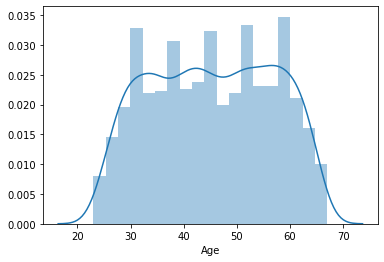

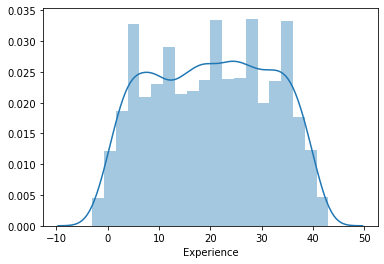

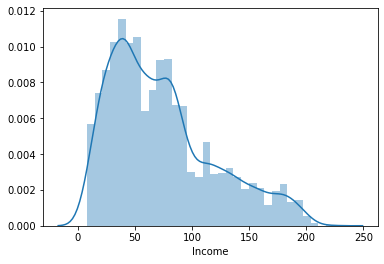

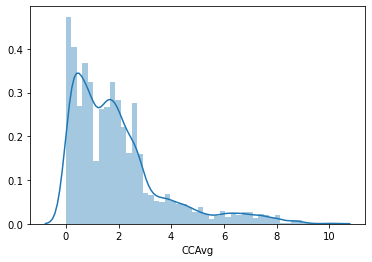

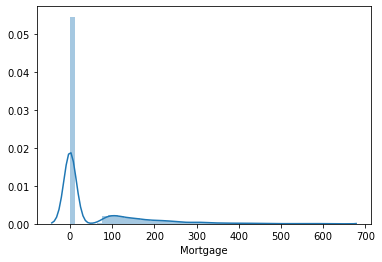

In [179]:
# distplot for continous columns
for i in ['Age','Experience','Income','CCAvg', 'Mortgage']:
    sns.distplot(loandata[i])
    plt.show()

### Notes:
    From the distribution above, it is seen that Age and Experience are almost identical and we may need either Age or Experience to calculate our model performance, but not both
    Both Income and CCAvg are positively skewed
    Mortgage is heavily skewed to the right. 

In [180]:
#Zip Code number of Unique value
loandata['ZIP Code'].nunique()

467

### Note:
    There are 467 unique Zip Codes

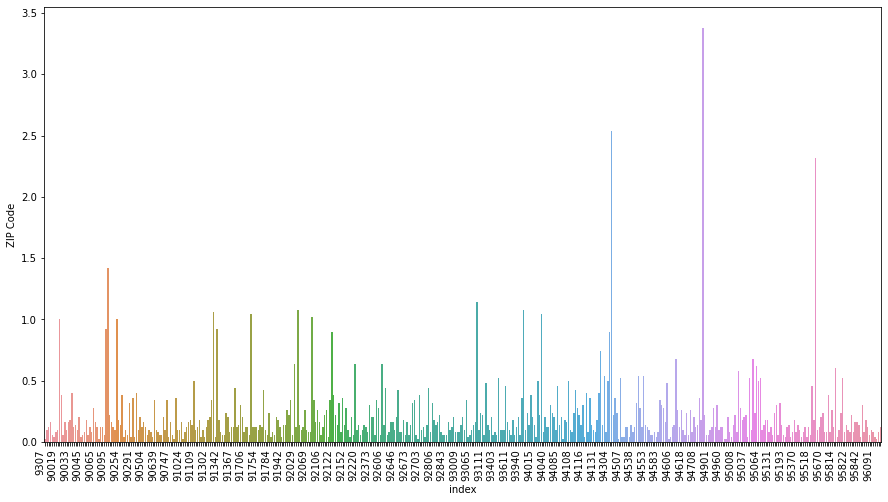

In [181]:
#Plot ZIP Code to see the data distribution
a = pd.DataFrame((loandata['ZIP Code'].value_counts(normalize=True)*100).reset_index())
plt.figure(figsize=[15,8])
ax = sns.barplot(x='index',y='ZIP Code', data=a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 7 == 0:  # every 7th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

### Notes: 
    There are no specific observations on ZipCode. There are some ouliers where a few zipcodes represeting a higher percentage of ditribution

In [182]:
# Check Unique Values for Income. It looks like a continuous variable but is it? 
np.sort(loandata['Income'].unique())

array([  8,   9,  10,  11,  12,  13,  14,  15,  18,  19,  20,  21,  22,
        23,  24,  25,  28,  29,  30,  31,  32,  33,  34,  35,  38,  39,
        40,  41,  42,  43,  44,  45,  48,  49,  50,  51,  52,  53,  54,
        55,  58,  59,  60,  61,  62,  63,  64,  65,  68,  69,  70,  71,
        72,  73,  74,  75,  78,  79,  80,  81,  82,  83,  84,  85,  88,
        89,  90,  91,  92,  93,  94,  95,  98,  99, 100, 101, 102, 103,
       104, 105, 108, 109, 110, 111, 112, 113, 114, 115, 118, 119, 120,
       121, 122, 123, 124, 125, 128, 129, 130, 131, 132, 133, 134, 135,
       138, 139, 140, 141, 142, 143, 144, 145, 148, 149, 150, 151, 152,
       153, 154, 155, 158, 159, 160, 161, 162, 163, 164, 165, 168, 169,
       170, 171, 172, 173, 174, 175, 178, 179, 180, 181, 182, 183, 184,
       185, 188, 189, 190, 191, 192, 193, 194, 195, 198, 199, 200, 201,
       202, 203, 204, 205, 218, 224], dtype=int64)

### Notes: 
    Income stays as a continuous variable

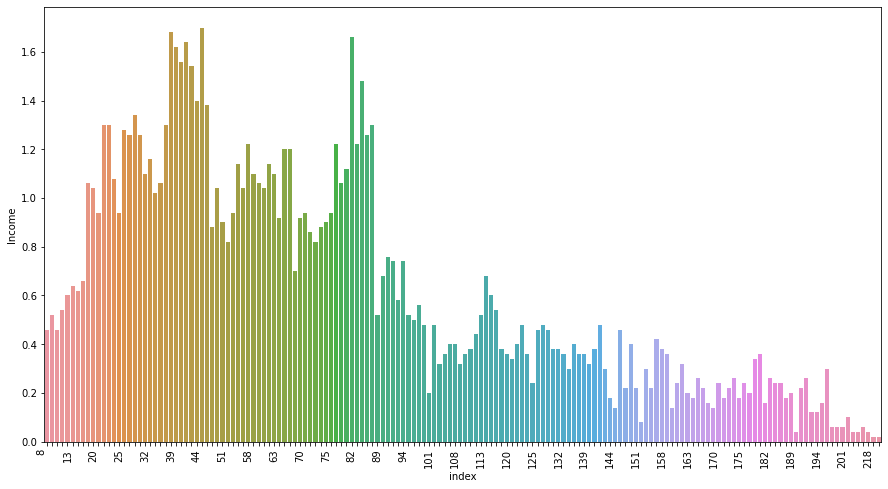

In [183]:
#Plot Income to see the data distribution
a = pd.DataFrame((loandata['Income'].value_counts(normalize=True)*100).reset_index())
plt.figure(figsize=[15,8])
ax = sns.barplot(x='index',y='Income', data=a)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

### Notes:
    Most of the Income lies between 18 to 88

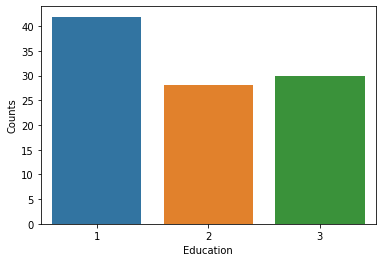

In [184]:
#get counts on Education
per_edu=pd.DataFrame(loandata['Education'].value_counts(normalize=True)*100).reset_index()
ax = sns.barplot(x='index', y='Education', data=per_edu)
plt.xlabel("Education")
plt.ylabel("Counts")
plt.show()

### Notes: 
    40% of population is undergrad. Graduate and Advanced education population is similar. 

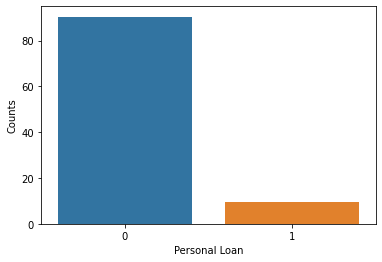

In [185]:
#get counts on Personal Loan
per_pl=pd.DataFrame(loandata['Personal Loan'].value_counts(normalize=True)*100).reset_index()
ax = sns.barplot(x='index', y='Personal Loan', data=per_pl)
plt.xlabel("Personal Loan")
plt.ylabel("Counts")
plt.show()

### Notes:
    Its just confirming that around 9 percent of customers accepted personal loan in the last campaign

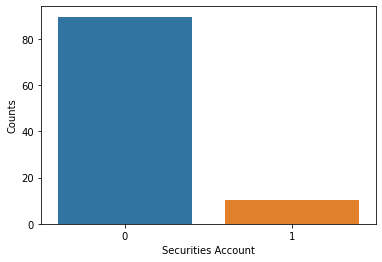

In [186]:
#get counts on Securities Account
per_sa=pd.DataFrame(loandata['Securities Account'].value_counts(normalize=True)*100).reset_index()
ax = sns.barplot(x='index', y='Securities Account', data=per_sa)
plt.xlabel("Securities Account")
plt.ylabel("Counts")
plt.show()

### Notes: 
    Securities Account distribution is very similar to Personal loan. However, it is yet to be seen whether there is a correlation. 

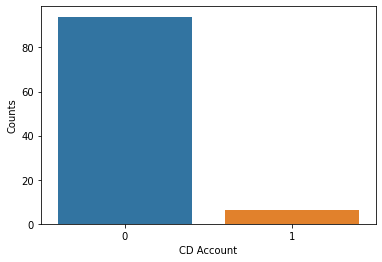

In [187]:
#get counts on CD Account
per_cd=pd.DataFrame(loandata['CD Account'].value_counts(normalize=True)*100).reset_index()
ax = sns.barplot(x='index', y='CD Account', data=per_cd)
plt.xlabel("CD Account")
plt.ylabel("Counts")
plt.show()

### Notes: 
    Most of the population does not have a CD Account. Yet to be seen if this will make any difference. 

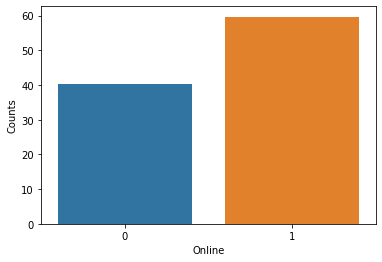

In [188]:
#get counts on Online
per_on=pd.DataFrame(loandata['Online'].value_counts(normalize=True)*100).reset_index()
ax = sns.barplot(x='index', y='Online', data=per_on)
plt.xlabel("Online")
plt.ylabel("Counts")
plt.show()

### Notes:
    around 60% of distribution uses internet banking facilities

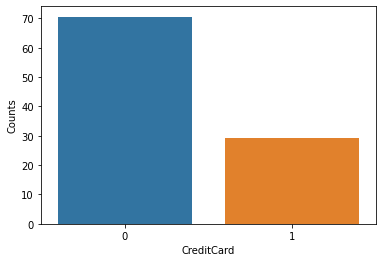

In [189]:
#get counts on CreditCard
per_cc=pd.DataFrame(loandata['CreditCard'].value_counts(normalize=True)*100).reset_index()
ax = sns.barplot(x='index', y='CreditCard', data=per_cc)
plt.xlabel("CreditCard")
plt.ylabel("Counts")
plt.show()

### Notes:
    Around 70% of population does not use credit card issued by the bank. 

### 2.5.2 Bivariate

In [190]:
loandata.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.00,0.99,-0.06,-0.03,-0.05,-0.05,0.04,-0.01,-0.01,-0.00,0.01,0.01,0.01
Experience,0.99,1.00,-0.05,-0.03,-0.05,-0.05,0.01,-0.01,-0.01,-0.00,0.01,0.01,0.01
Income,-0.06,-0.05,1.00,-0.02,-0.16,0.65,-0.19,0.21,0.50,-0.00,0.17,0.01,-0.00
ZIP Code,-0.03,-0.03,-0.02,1.00,0.01,-0.00,-0.02,0.01,0.00,0.00,0.02,0.02,0.01
Family,-0.05,-0.05,-0.16,0.01,1.00,-0.11,0.06,-0.02,0.06,0.02,0.01,0.01,0.01
CCAvg,-0.05,-0.05,0.65,-0.00,-0.11,1.00,-0.14,0.11,0.37,0.02,0.14,-0.00,-0.01
Education,0.04,0.01,-0.19,-0.02,0.06,-0.14,1.00,-0.03,0.14,-0.01,0.01,-0.02,-0.01
Mortgage,-0.01,-0.01,0.21,0.01,-0.02,0.11,-0.03,1.00,0.14,-0.01,0.09,-0.01,-0.01
Personal Loan,-0.01,-0.01,0.50,0.00,0.06,0.37,0.14,0.14,1.00,0.02,0.32,0.01,0.00
Securities Account,-0.00,-0.00,-0.00,0.00,0.02,0.02,-0.01,-0.01,0.02,1.00,0.32,0.01,-0.02


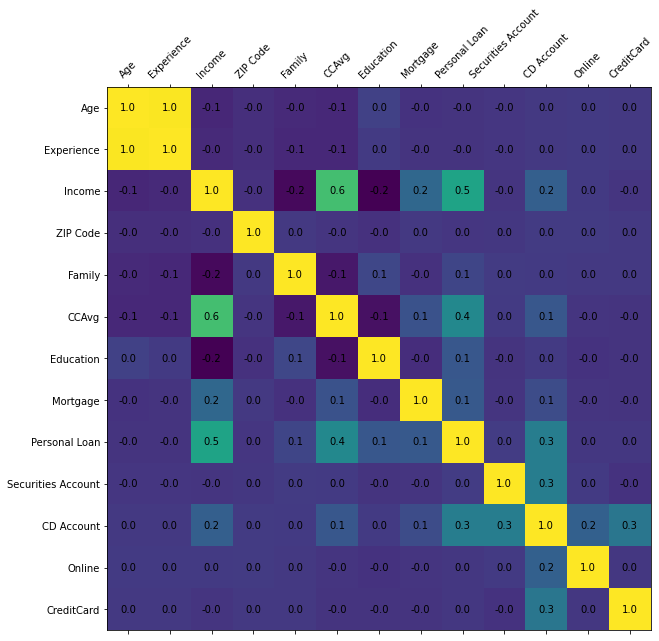

In [191]:
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plot_corr(loandata)

### Notes: 
    From the correlation heatmap we can see that Age and Experience has a correlation of 1.
    Income, CCAvg, and CD Account has a correlation of 0.5, 04, and 0.3 with Personal Loan

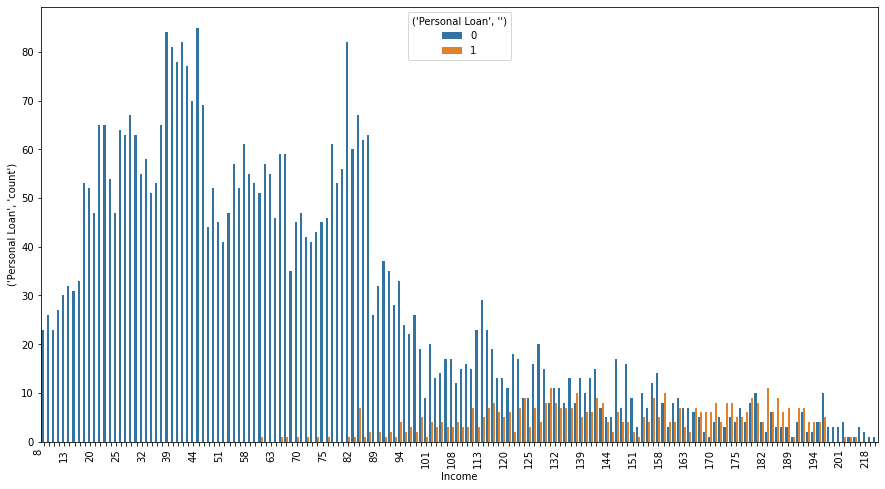

In [192]:
p0 = loandata.groupby(['Income','Personal Loan']).agg({'Personal Loan': ['count']}).reset_index()
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Income', y=('Personal Loan','count'),hue=('Personal Loan',''), data=p0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

### Notes: 
    It can inferred from the graph above that customers who earn more are more likely to opt for personal loan

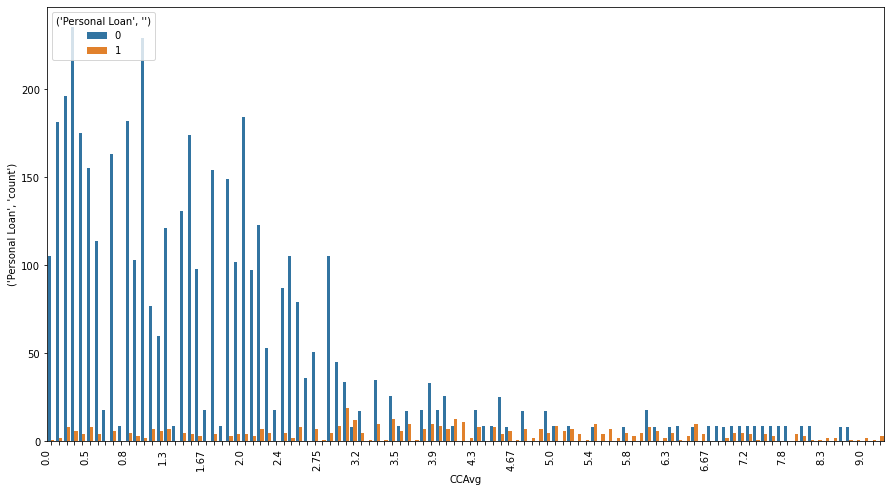

In [193]:
p0 = loandata.groupby(['CCAvg','Personal Loan']).agg({'Personal Loan': ['count']}).reset_index()
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='CCAvg', y=('Personal Loan','count'),hue=('Personal Loan',''), data=p0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 5 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

### Notes:
    It can be inferred from the above graph that the dataset contains a lot of customers with lower average credit card spending per month and also customers with higher average spending seem to have a higher rate or percentage of choosing personal loan

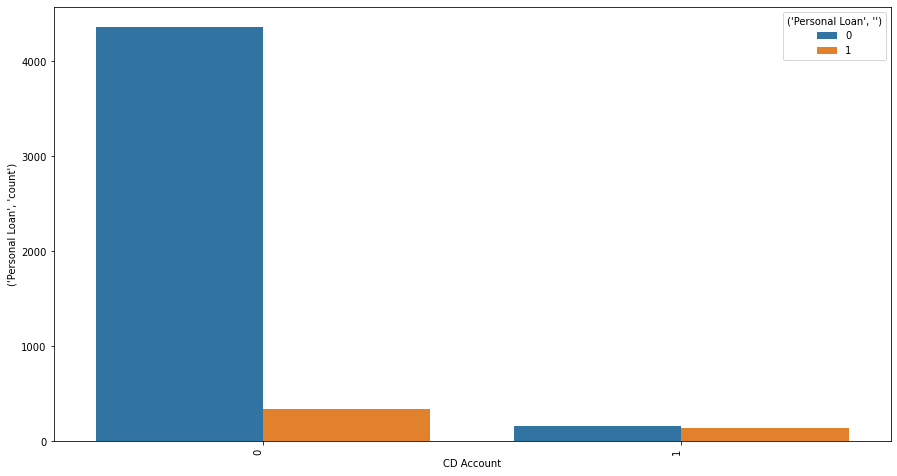

In [194]:
p0 = loandata.groupby(['CD Account','Personal Loan']).agg({'Personal Loan': ['count']}).reset_index()
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='CD Account', y=('Personal Loan','count'),hue=('Personal Loan',''), data=p0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.show()

### Notes:
    A small percentage of customers who were not on a CD Account chose Personal Loans. But a high percentage of customers who were on a CD Account chose to opt-in for personal Loans

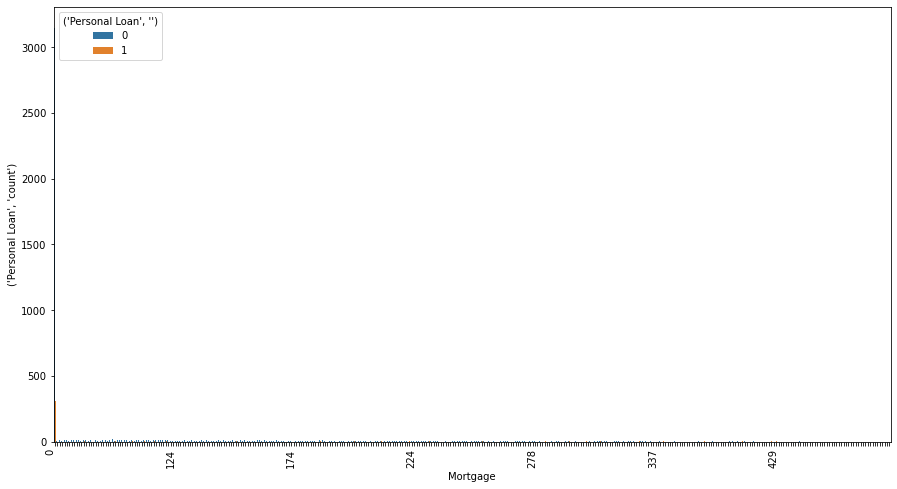

In [195]:
p0 = loandata.groupby(['Mortgage','Personal Loan']).agg({'Personal Loan': ['count']}).reset_index()
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Mortgage', y=('Personal Loan','count'),hue=('Personal Loan',''), data=p0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 50 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

### Notes: 
    There is no relation between mortgage and Personal Loan. It can be dropped. 

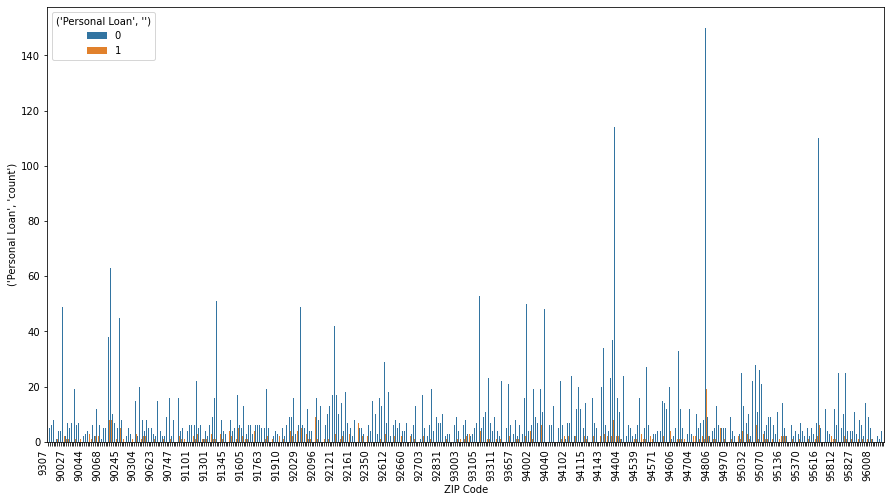

In [196]:
p0 = loandata.groupby(['ZIP Code','Personal Loan']).agg({'Personal Loan': ['count']}).reset_index()
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='ZIP Code', y=('Personal Loan','count'),hue=('Personal Loan',''), data=p0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 10 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

### Notes: 
    No specific relation between Zip Code and Personal Loan

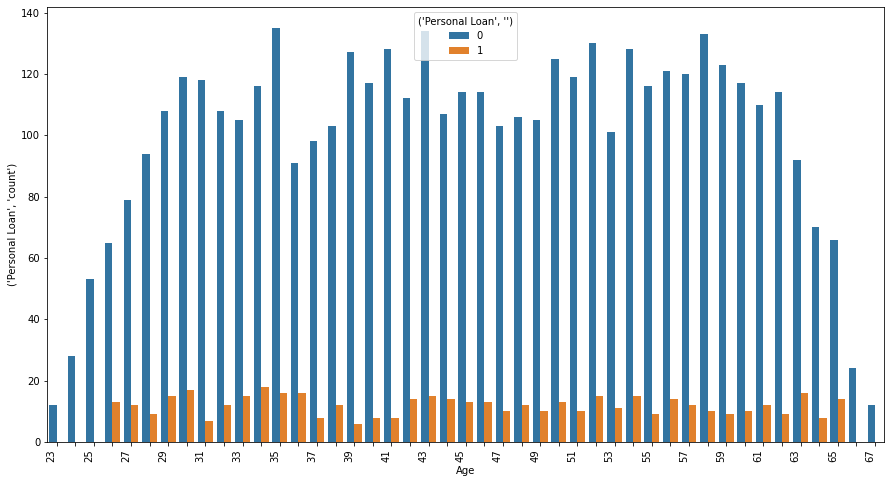

In [197]:
p0 = loandata.groupby(['Age','Personal Loan']).agg({'Personal Loan': ['count']}).reset_index()
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Age', y=('Personal Loan','count'),hue=('Personal Loan',''), data=p0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

### Notes: 
    There are no personal loans taken by customers between Age 23 - 25, and 66 - 67. 
    For the rest, data is very evenly distributed and count is always < 20

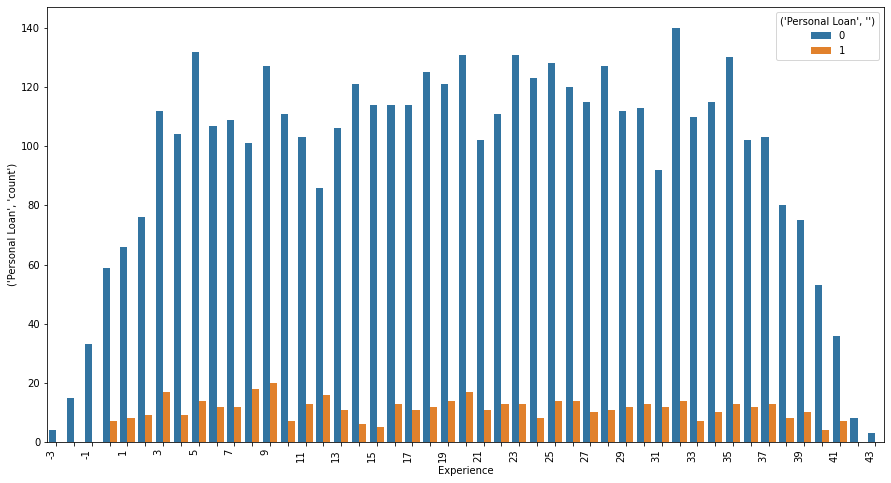

In [198]:
p0 = loandata.groupby(['Experience','Personal Loan']).agg({'Personal Loan': ['count']}).reset_index()
plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Experience', y=('Personal Loan','count'),hue=('Personal Loan',''), data=p0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
for ind, label in enumerate(ax.get_xticklabels()):
    if ind % 2 == 0:  # every 5th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

### Notes:
    Same with Experience as Age, there is no specific relation. The data is evenly ditributed and for all varying experiences personal loan count < 20

In [199]:
#Get a Cross Tab for all Categoricals
pd.crosstab(loandata['Family'],loandata['Personal Loan'],normalize='index')

Personal Loan,0,1
Family,,
1,0.93,0.07
2,0.92,0.08
3,0.87,0.13
4,0.89,0.11


### Notes:
    No specific relation between Family and Personal Loan

In [200]:
pd.crosstab(loandata['Education'],loandata['Personal Loan'],normalize='index')

Personal Loan,0,1
Education,,
1,0.96,0.04
2,0.87,0.13
3,0.86,0.14


### Notes:
    No specific relation between Education and Personal Loan

In [201]:
pd.crosstab(loandata['Securities Account'],loandata['Personal Loan'],normalize='index')

Personal Loan,0,1
Securities Account,,
0,0.91,0.09
1,0.89,0.11


### Notes:
    No Specific relation between Securities Account and Personal Loan

In [202]:
pd.crosstab(loandata['CD Account'],loandata['Personal Loan'],normalize='index')

Personal Loan,0,1
CD Account,,
0,0.93,0.07
1,0.54,0.46


### Notes: 
    Customers with CD Account are more likely to get a Personal Loan

In [203]:
pd.crosstab(loandata['Online'],loandata['Personal Loan'],normalize='index')

Personal Loan,0,1
Online,,
0,0.91,0.09
1,0.90,0.10


### Notes
    No specific relation between Internet banking and Personal Loan

In [204]:
pd.crosstab(loandata['CreditCard'],loandata['Personal Loan'],normalize='index')

Personal Loan,0,1
CreditCard,,
0,0.90,0.10
1,0.90,0.10


### Notes:
There seem to be no specific relation between customers who use Credit Card issued by Bank and customers who Personal Loan

## Section Notes:
    ID can be dropped as it has no value.
    Mortgage can be dropped. Mortgage has no co-relation with Personal Loan, and ~ 75% customers either have 0 mortgage or did not have that information. 
    Experience can be dropped, as Age and Experience seem to have exactly similar distribution. Their correlation is 1. 
    Try Age as both Continuous and Categorical Variable.
    Income, CCAvg remain as continuous variables
    Most of the data is evenly distributed by Zip Code. 
   

### "Highlights"
**When you try Age as a categorical variable, it increases the accuracy, precision, recall, and AUC for the model.**  
**Drop ZIP Code, it increases the accuracy, precision, recall, and AUC for the model.**  
**Dropping Securities Account, Online, and CreditCard does not have much impact. Infact in some cases it reduces accuracy, precision, recall, and AUC for the model.**

In [205]:
loandata.drop(['Experience','Mortgage','ZIP Code'],axis=1,inplace=True)

#### 2.6 Get data model ready

In [206]:
# Convert all others as Categorical. Only Keep Income, CCAvg as continuous variables
for col in ['Age','Family','Education','Securities Account', 'Online','CreditCard','CD Account']:
    loandata[col] = loandata[col].astype('category')

In [207]:
#Seperate the dependent and independent variable
X = loandata.drop('Personal Loan', axis=1)
Y = loandata['Personal Loan'].astype('category')

In [208]:
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   category
 1   Income              5000 non-null   int64   
 2   Family              5000 non-null   category
 3   CCAvg               5000 non-null   float64 
 4   Education           5000 non-null   category
 5   Personal Loan       5000 non-null   int64   
 6   Securities Account  5000 non-null   category
 7   CD Account          5000 non-null   category
 8   Online              5000 non-null   category
 9   CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(2)
memory usage: 153.8 KB


In [209]:
#Convert Categorical Variables into Dummy Variables, drop_first 
#reduces the number of columns and hence increases the computational time.
X = pd.get_dummies(X, drop_first=True)

### 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [210]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42 )

### 4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [211]:
from sklearn.linear_model import LogisticRegression 

lr = LogisticRegression(random_state=7)
lr.fit(X_train,y_train)
lr

LogisticRegression(random_state=7)

In [212]:
y_predicted =  lr.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [213]:
#Create a DataFrame to get the Actual vs Probable values
z = pd.DataFrame()
z['Actual'] = y_test.values
z['Probaility that output is 0'] = lr.predict_proba(X_test)[:,0]
# Probabilities predicted by Logistic regression model
z['Probaility that output is 1'] = lr.predict_proba(X_test)[:,1]
z['Predicted'] = y_predicted
z.head()

,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
0,0,1.00,0.00,0
1,1,0.83,0.17,0
2,0,0.99,0.01,0
3,0,1.00,0.00,0
4,0,0.99,0.01,0


In [214]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [215]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

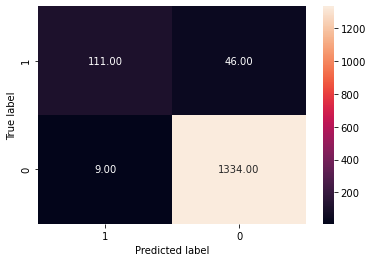

In [216]:
draw_cm(z['Actual'], z['Predicted'])

### Notes: 
    Total number of false positive + false negative = 55. This is the lowest I got after performing multiple iterations and dropping and adding features.

In [217]:
print( 'Total Accuracy : ',np.round( accuracy_score( y_test, lr.predict(X_test) ), 2 ) )

Total Accuracy :  0.96


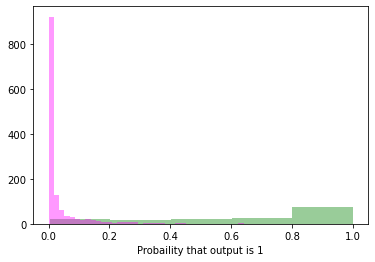

In [218]:
sns.distplot( z[z['Actual'] == 1]["Probaility that output is 1"], kde=False, color = 'green' )
sns.distplot( z[z['Actual'] == 0]["Probaility that output is 1"], kde=False, color = 'magenta' )
plt.show()

In [219]:
#confusion matrix
cm = confusion_matrix( z['Actual'], z['Predicted'], [1,0] )
cm

array([[ 111,   46],
       [   9, 1334]], dtype=int64)

In [220]:
#Calculate True Postive Rate, True Negative Rate, Precision, Recall, F1 Score, and Accuracy
#calculate true positive rate
#TP/(TP+FN)
cms = cm.sum(axis=1)
tpr = cm[0,0]/cms[0]
tpr
#calculate true negative rate
# TN/(TN+FP)
tnr = cm[1,1]/cms[1]
accuracy = 1 - ((cm[1,0]+cm[0,1])/cm.sum())
#calculate precision
cmp = cm.sum(axis=0)
pr = cm[0,0]/cmp[0]
re = tpr
#f1_score = 2 * precision * recall/(precision + recall)
f1_score = 2 * pr*re/(pr+re)
print("True Positive Rate: ", tpr)
print("True Negative Rate: ", tnr)
print("Precision:", pr)
print("Recall or Sensitivity:", re)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)

True Positive Rate:  0.7070063694267515
True Negative Rate:  0.9932985852568875
Precision: 0.925
Recall or Sensitivity: 0.7070063694267515
F1 Score: 0.8014440433212996
Accuracy: 0.9633333333333334


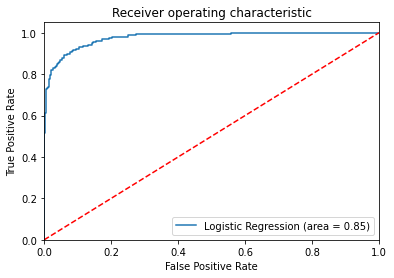

In [221]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Notes: 
    This is the highest AUC I got. Previously I have 64, 79, 83, 84. 

### 5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [222]:
## Feature Importance or Coefficients 
fi = pd.DataFrame()
fi['Col'] = X_train.columns
fi['Coeff'] = np.round(abs(lr.coef_[0]),2)
fi.sort_values(by='Coeff',ascending=False)

,Col,Coeff
50,Education_3,3.20
52,CD Account_1,3.12
49,Education_2,3.11
48,Family_4,1.59
47,Family_3,1.55
9,Age_31,1.03
15,Age_37,0.83
54,CreditCard_1,0.81
51,Securities Account_1,0.81
41,Age_63,0.68


In [223]:
#high level check where Acutual does not match with Predicted
z[z['Actual'] != z['Predicted']]

,Actual,Probaility that output is 0,Probaility that output is 1,Predicted
1,1,0.83,0.17,0
97,1,0.75,0.25,0
103,1,0.92,0.08,0
173,1,0.62,0.38,0
189,0,0.38,0.62,1
205,1,0.84,0.16,0
260,1,0.76,0.24,0
327,1,0.93,0.07,0
391,1,0.58,0.42,0
396,1,0.98,0.02,0


In [224]:
#Get the initial data and check where the prediction was incorrect. 
a = pd.DataFrame(y_test)
b = pd.DataFrame(y_predicted)
a.rename(columns = {'Personal Loan':'True Values'}, inplace = True)
b.rename(columns = {0:'Predicted Values'}, inplace = True)
loantotal = a.merge(loandata, how='inner',left_index=True,right_index=True)

In [225]:
loantotal['Predicted'] = y_predicted

In [226]:
#For the loan data check where True values dont match Prediction in the Test Data
loantotal[loantotal['Personal Loan'] != loantotal['Predicted']]

,True Values,Age,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard,Predicted
2586,1,47,149,4,6.10,1,1,0,0,0,1,0
3456,1,46,125,2,4.70,3,1,0,0,1,0,0
4439,1,33,104,2,3.60,3,1,0,0,0,1,0
3039,1,34,141,2,4.90,3,1,0,0,0,1,0
1886,0,65,115,4,1.70,2,0,0,0,0,0,1
2194,1,34,123,1,1.60,2,1,0,0,1,0,0
1589,1,57,124,1,0.20,2,1,0,0,1,0,0
505,1,36,69,3,3.10,2,1,0,0,1,0,0
4625,1,45,102,4,4.70,2,1,0,0,0,0,0
1632,1,31,93,2,3.10,2,1,0,0,1,0,0


### Notes:
    It can be validated from the confusion matrix heatmap that total number of false postive + false negative = 55. 

### 6. Give conclusion related to the Business understanding of your model? (5 marks)

##### `Confusion matrix means`

*True Positive (observed=1,predicted=1):*

Predicted that home loan will be granted and the customer was eligibile for loan

*False Positive (observed=0,predicted=1):*

Predicted that home loan will be granted and the customer was not eligibile for loan

*True Negative (observed=0,predicted=0):*

Predicted that home loan will not be granted and the customer was not eligibile for loan

*False Negative (observed=1,predicted=0):*

Predicted that home loan will not be granted and the customer was eligibile for loan

##### `Important Features`

Based on the coefficient values of the features - "Education", "CD Account", "Family", "Age", "CreditCard" seem to be top important features. 



##### `Important Metric`

Thera Bank wants to identify which liability customers are more likely to get a personal loan from the bank. In this case, **false positves need to be lower** because they would need to pull more funds to target a larger inaccurate population for the personal loan campaign and for this campaign they want to keep the budget to minimal. Hence **Precision is the important metric**.

In case of False negative bank will lose few customers but that is ok since the idea is to to target with more accuracy and keep the budget lower. 

The bank can now predict which liability customer is more likely to opt in for a personal loan.